In [1]:
#Import necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Using the EDA files
%store -r pub_assist1
%store -r data
%store -r edu_fil
%store -r contract_housing1
%store -r income_data

In [3]:
# Merging the DataFrames on common columns (Neighborhood and Id)
merged_data = pub_assist1.merge(data, on=['Neighborhood', 'Id'], how='inner')
merged_data = merged_data.merge(edu_fil, on=['Neighborhood', 'Id'], how='inner')
merged_data = merged_data.merge(contract_housing1, on=['Neighborhood', 'Id'], how='inner')
merged_data = merged_data.merge(income_data, on=['Neighborhood', 'Id'], how='inner')

# Displaying the merged DataFrame
print("Merged DataFrame:")
print(merged_data)


Merged DataFrame:
           Neighborhood  Id  Estimate public assist; Total:  \
0      Allegheny Center   1                             870   
1        Allegheny West   2                             146   
2             Allentown   3                            1069   
3             Arlington   4                             701   
4     Arlington Heights   5                             144   
..                  ...  ..                             ...   
86  Upper Lawrenceville  87                            1287   
87             West End  88                              99   
88         West Oakland  89                             630   
89             Westwood  90                            1492   
90              Windgap  91                             647   

    Margin of Error public assist; Total:  \
0                               93.000000   
1                               36.000000   
2                              132.457540   
3                              104.465305   


In [4]:
# Displaying the column names of the merged DataFrame
print(merged_data.columns)

Index(['Neighborhood', 'Id', 'Estimate public assist; Total:',
       'Margin of Error public assist; Total:',
       'With public assistance income percentage',
       'No public assistance income percentage', 'Estimate; Total:_x',
       'Margin of Error; Total:_x', 'Low range', 'Mid range', 'High range',
       'Estimate education; Total:', 'Margin of Error education; Total:',
       'No schooling completed percentage', 'Nursery school percentage',
       'Kindergarden percentage', '1st grade percentage',
       '2nd grade percentage', '3rd grade percentage', '4th grade percentage',
       '5th grade percentage', '6th grade percentage', '7th grade percentage',
       '8th grade percentage', '9th grade percentage', '10th grade percentage',
       '11th grade percentage', '12th grade, no diploma percentage',
       'Regular high school diploma percentage',
       'GED or alternative credential percentage',
       'Some college, less than 1 year percentage',
       'Some college, 1 or 

In [5]:
#The data types of each column
print(merged_data.dtypes)

Neighborhood                                                                                        object
Id                                                                                                   int64
Estimate public assist; Total:                                                                       int64
Margin of Error public assist; Total:                                                              float64
With public assistance income percentage                                                           float64
No public assistance income percentage                                                             float64
Estimate; Total:_x                                                                                   int64
Margin of Error; Total:_x                                                                          float64
Low range                                                                                            int64
Mid range                            

In [6]:
# Converting the two columns to numeric, coercing errors to NaN
merged_data['Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)'] = pd.to_numeric(
    merged_data['Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)'], errors='coerce'
)

merged_data['Margin of Error; Aggregate'] = pd.to_numeric(
    merged_data['Margin of Error; Aggregate'], errors='coerce'
)


In [7]:
print(merged_data.dtypes)

Neighborhood                                                                                        object
Id                                                                                                   int64
Estimate public assist; Total:                                                                       int64
Margin of Error public assist; Total:                                                              float64
With public assistance income percentage                                                           float64
No public assistance income percentage                                                             float64
Estimate; Total:_x                                                                                   int64
Margin of Error; Total:_x                                                                          float64
Low range                                                                                            int64
Mid range                            

In [8]:
# Defining the features (excluding non-feature columns and the target variable)
X = merged_data.drop(['Neighborhood', 'Id', 'Estimate; With cash rent:'], axis=1)

# Defining the target variable
y = merged_data['Estimate; With cash rent:']

In [9]:
# Identifying and replacing the NaN values in the target variable
y = y.fillna(y.mean())
X = X.apply(lambda col: col.fillna(col.mean()), axis=0)

In [10]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.13895387817845e-18


In [11]:
# Calculate R-squared
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 1.0


Coefficients:
Estimate public assist; Total:                                                                     1.445783e-01
Margin of Error public assist; Total:                                                             -5.148862e-11
With public assistance income percentage                                                          -1.987950e-11
No public assistance income percentage                                                             1.985350e-11
Estimate; Total:_x                                                                                -1.084337e-01
Margin of Error; Total:_x                                                                          1.026612e-11
Low range                                                                                         -3.614458e-02
Mid range                                                                                         -3.614458e-02
High range                                                                                

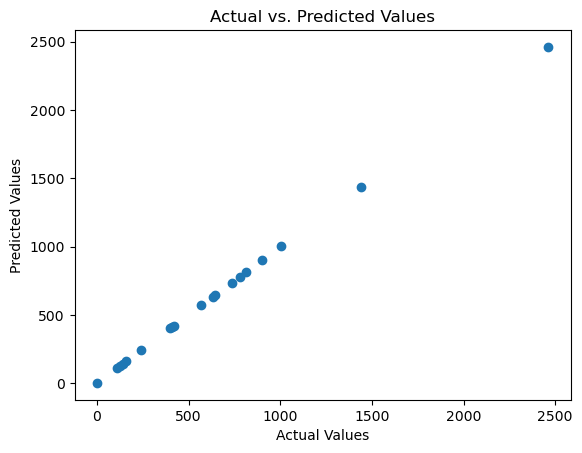

In [12]:
# Accessing coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:")
print(coefficients)

# Visualizing actual vs. predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


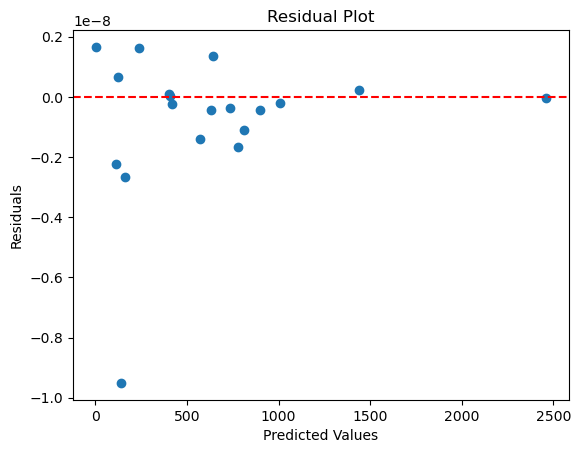

In [13]:
# Creating residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()